In [1]:
events_file_path = "../event_data/Sündmused_2011-2015_Marek.xlsx"
cached_events_file_path = "../Cache/events.csv"

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns; sns.set(color_codes=True)
from datetime import datetime

import os, sys
lib_path = os.path.abspath(os.path.join('..', 'py'))
sys.path.append(lib_path)

import rescue_events as re

In [2]:
events = re.load(events_file_path, cached_events_file_path)

Loading Data
Data Loaded!
110478 events loaded
9814 rows have missing datetime - removing



In [3]:
start_date = events.Aeg.min().date()
end_date   = events.Aeg.max().date()
days  = pd.date_range(start=start_date, end=end_date,  freq='D')
events["date"] = events.Aeg.map(pd.Timestamp.date).astype("datetime64[ns]")
daily_count = pd.DataFrame(events[["Aeg","date"]].groupby(["date"]).count()["Aeg"].loc[days].fillna(0).astype("int16"))
daily_count_by_type = events.pivot_table(
    index="date", 
    columns="Väljakutse liik SOS",
    values="Aeg",
    aggfunc="count",
    fill_value=0
).loc[days].fillna(0).astype("int16")

In [4]:
def plot_seasonality(input_series):
    original = input_series
    date_axis = original.index

    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(original.values, freq=365)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure( figsize=(12,10))
    ax = plt.subplot(411)
    ax.set_title(original.name)
    plt.plot(original, label='Original')
    plt.legend(loc='best')
    plt.subplot(412, sharex=ax)
    plt.plot(date_axis, trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413, sharex=ax)
    plt.plot(date_axis, seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414, sharex=ax)
    plt.plot(date_axis, residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## Seasonality of all events

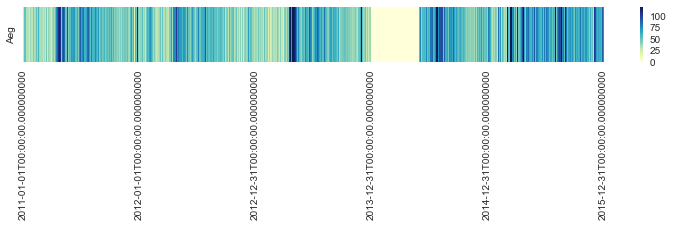

In [5]:
fig, ax = plt.subplots(figsize=(13, 1))
sns.heatmap(daily_count.transpose(), xticklabels=365, robust=True, cmap="YlGnBu");

c:\users\markl\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


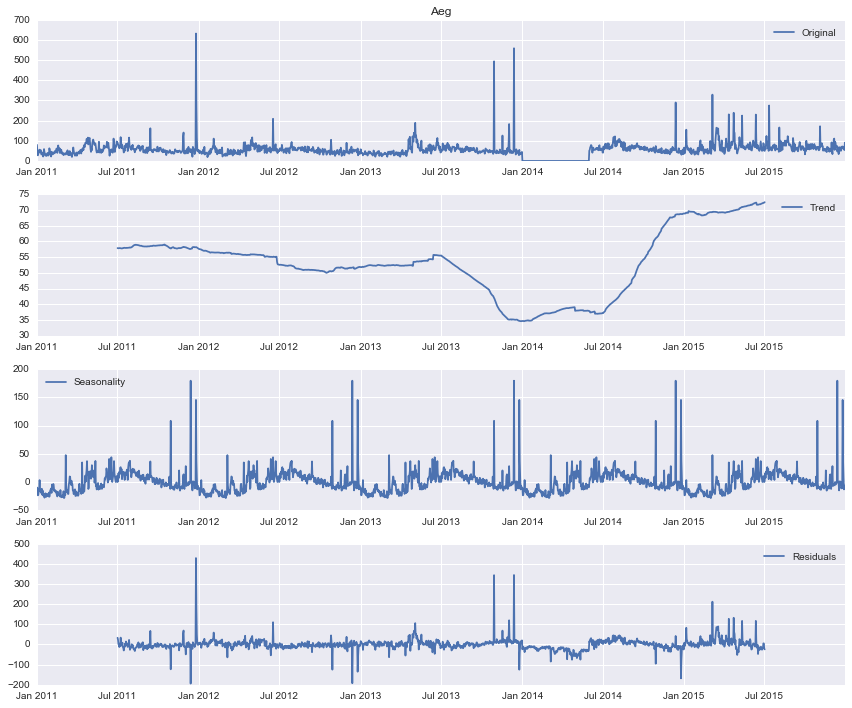

In [6]:
plot_seasonality(daily_count["Aeg"])

## Seasonality of events, separated by type

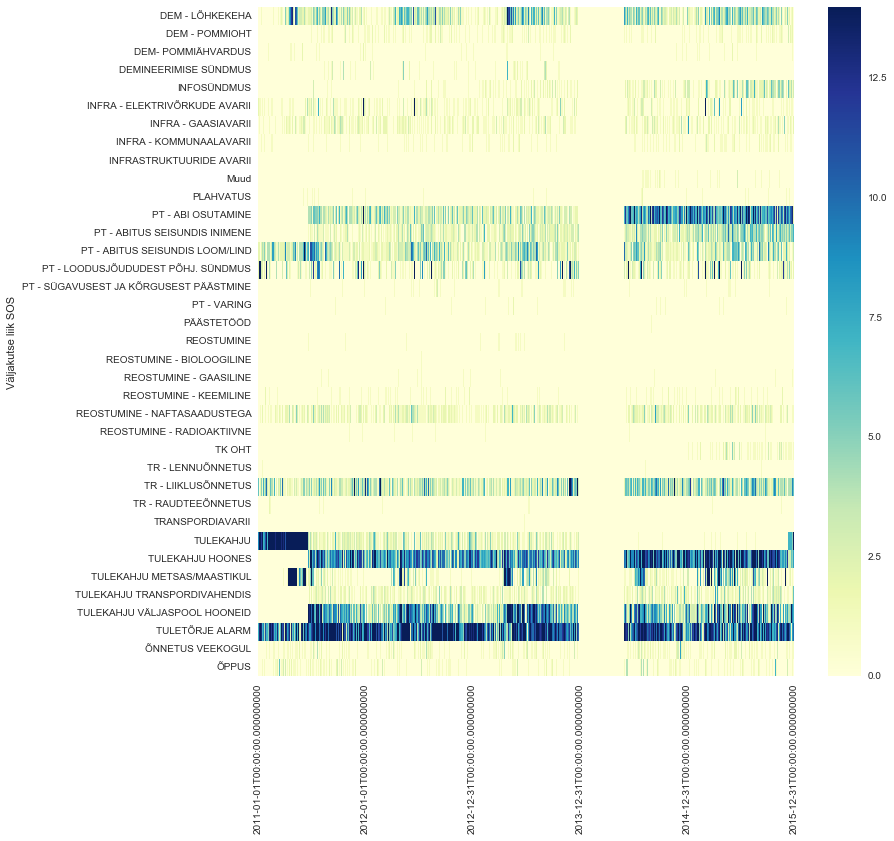

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(daily_count_by_type.transpose(), xticklabels=365, robust=True, cmap="YlGnBu")

DEM - LÕHKEKEHA


c:\users\markl\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


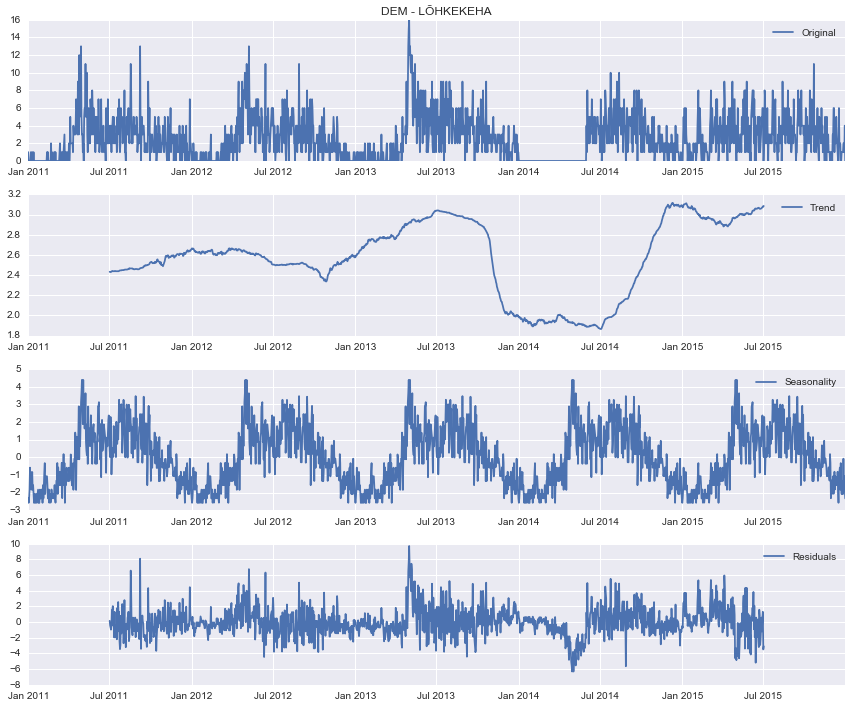

DEM - POMMIOHT


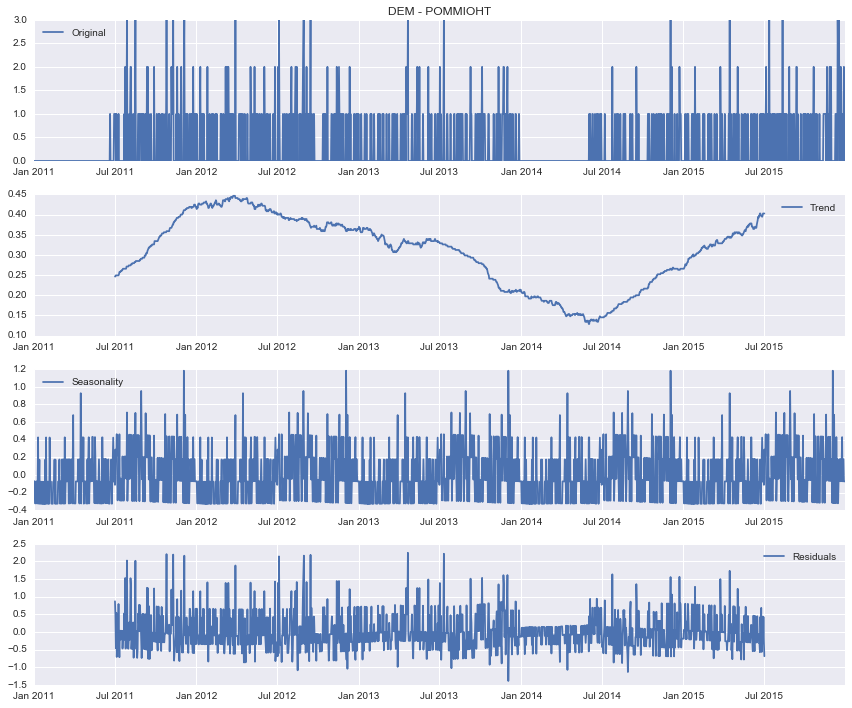

DEM- POMMIÄHVARDUS


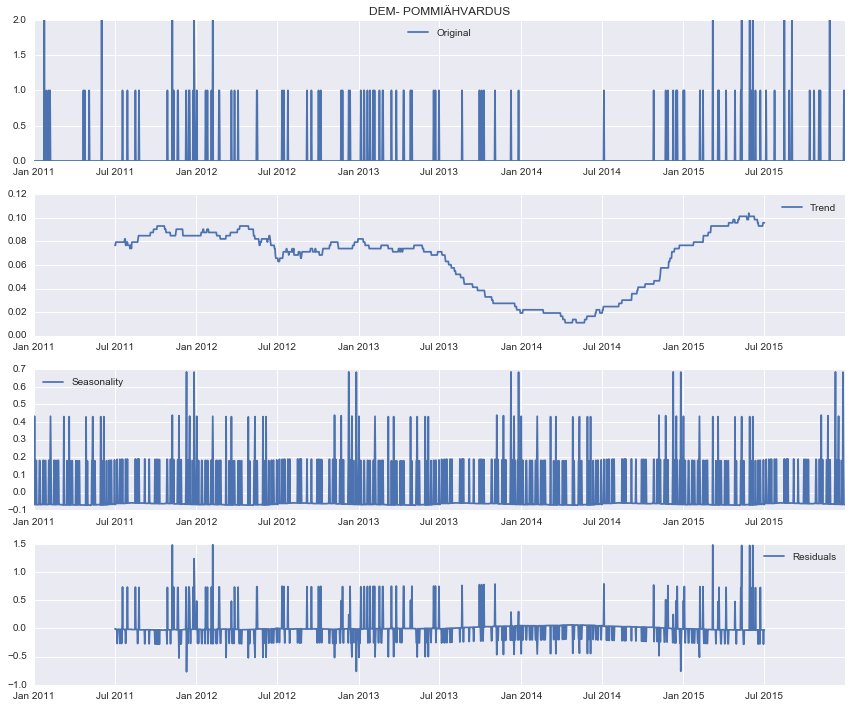

DEMINEERIMISE SÜNDMUS


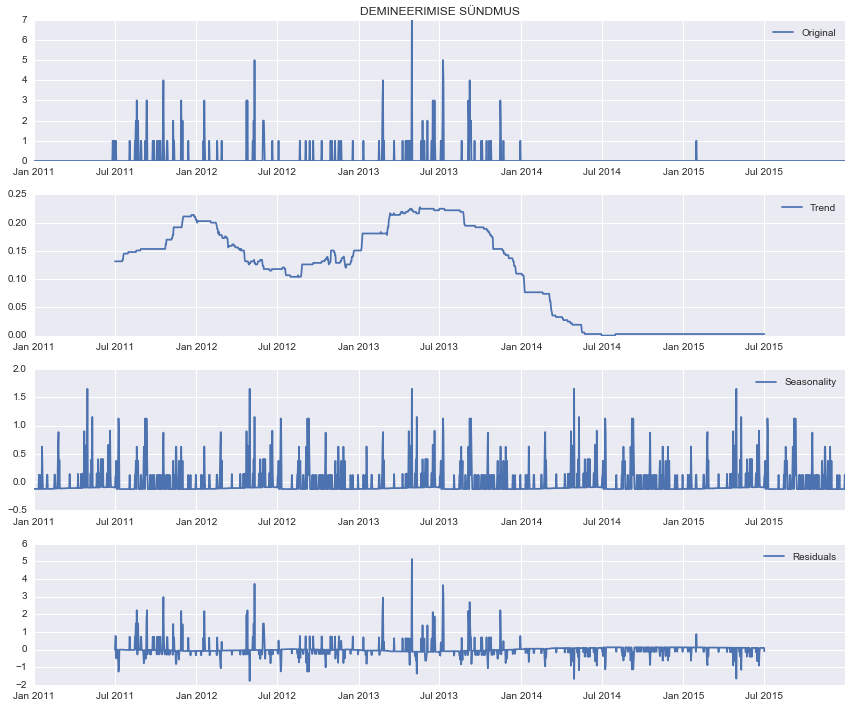

INFOSÜNDMUS


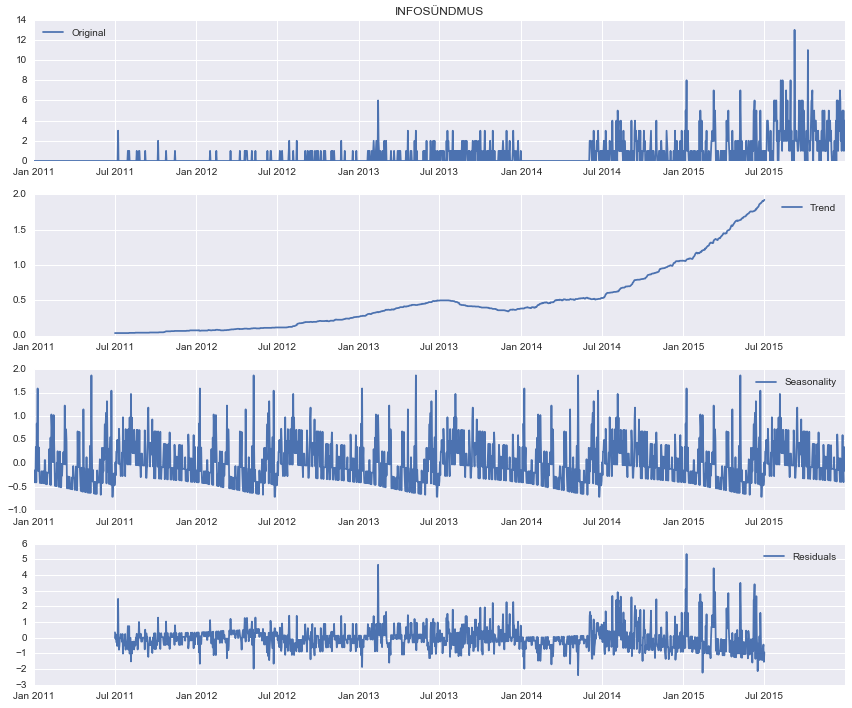

INFRA - ELEKTRIVÕRKUDE AVARII


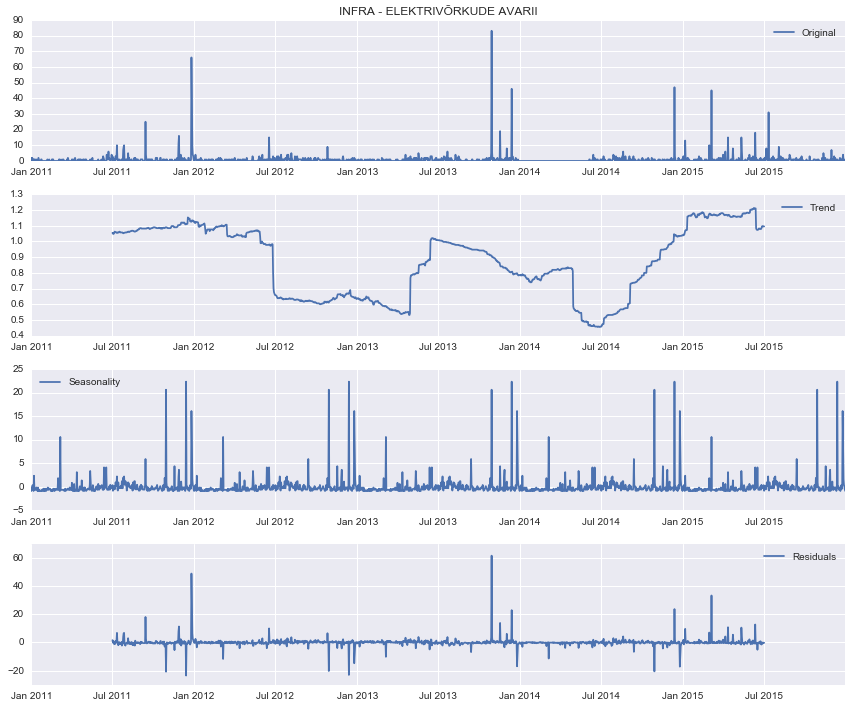

INFRA - GAASIAVARII


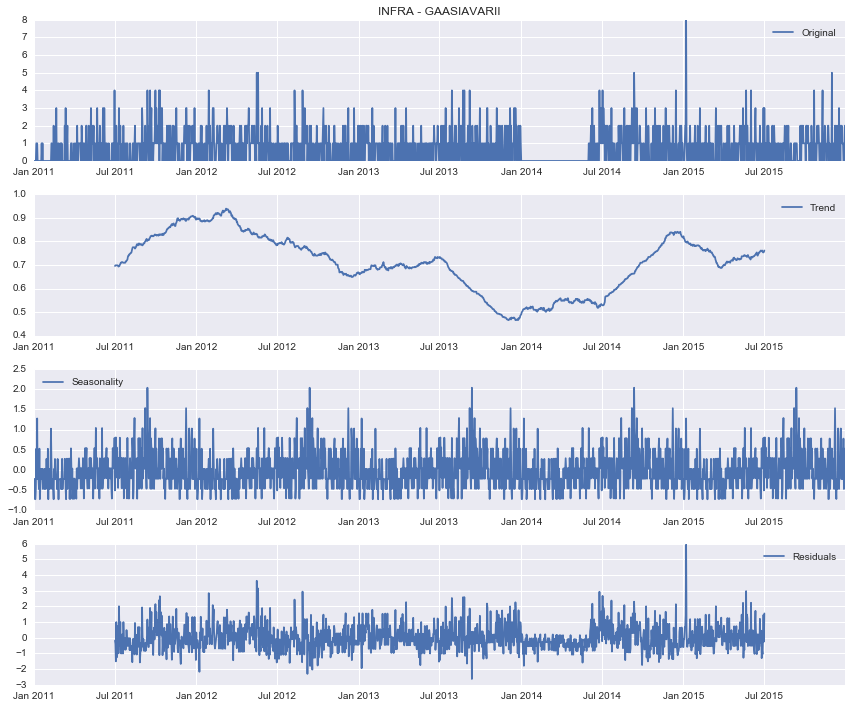

INFRA - KOMMUNAALAVARII


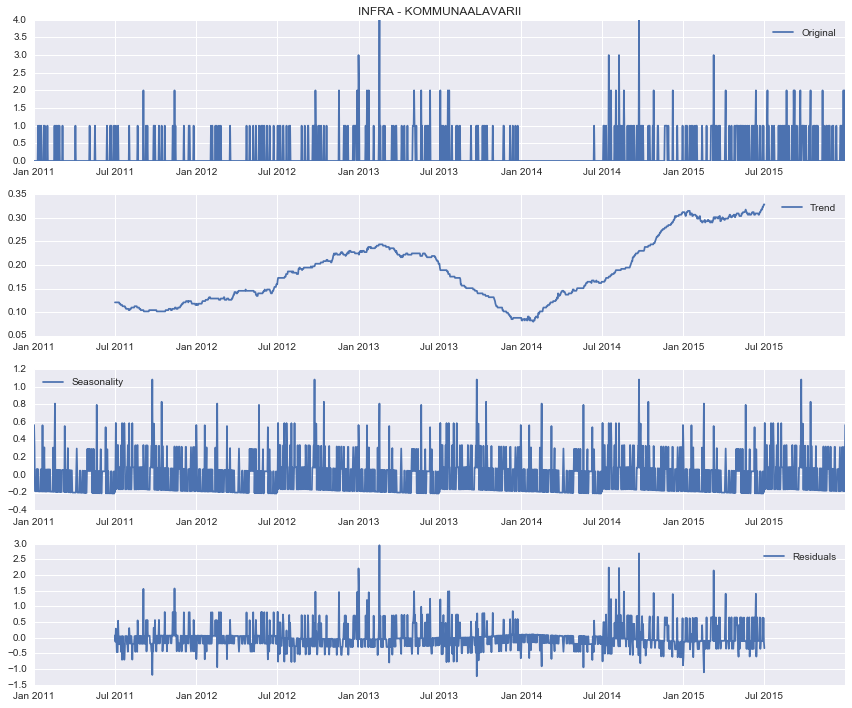

INFRASTRUKTUURIDE AVARII


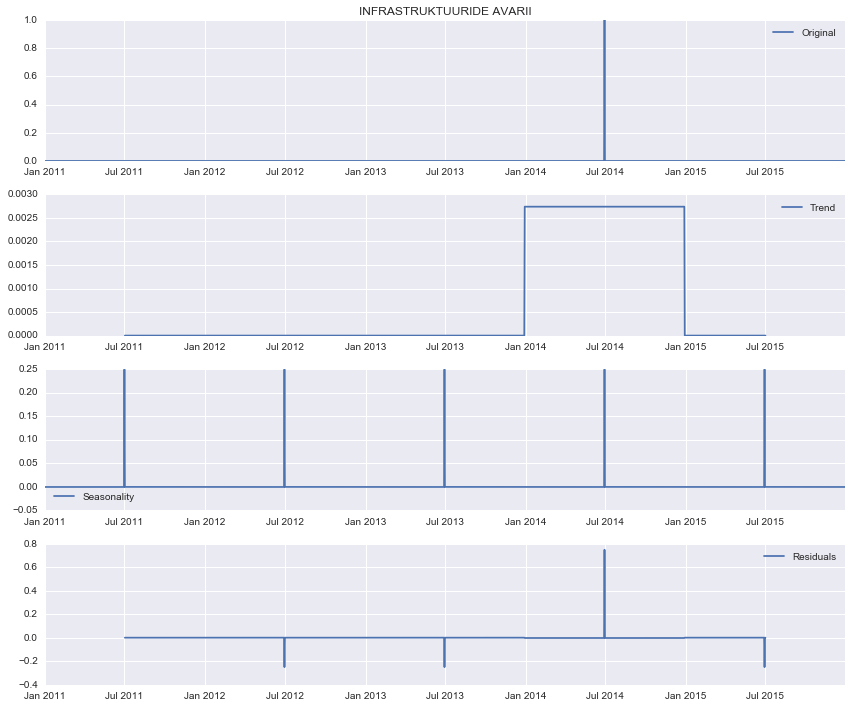

Muud


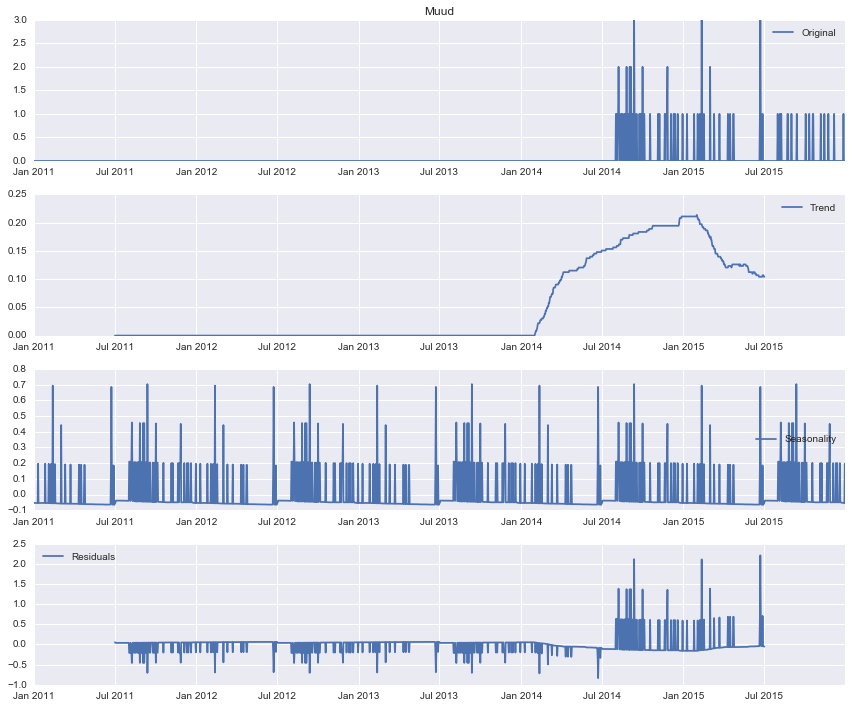

PLAHVATUS


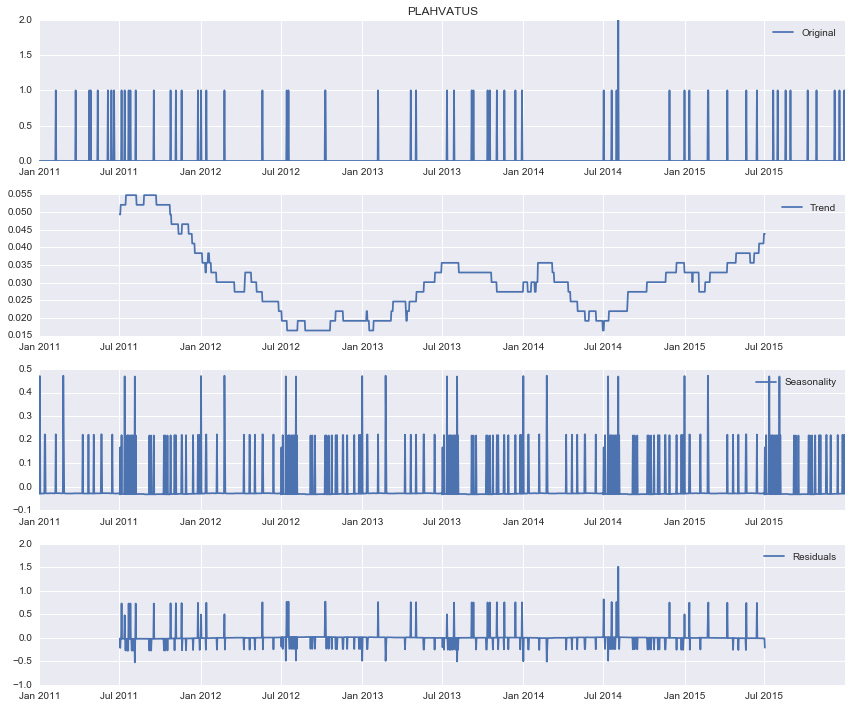

PT - ABI OSUTAMINE


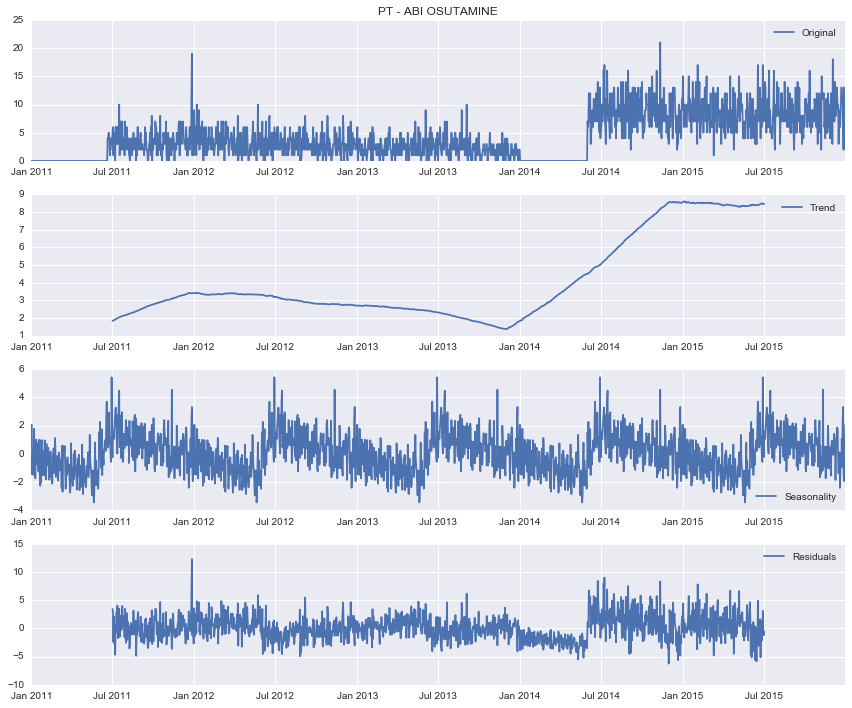

PT - ABITUS SEISUNDIS INIMENE


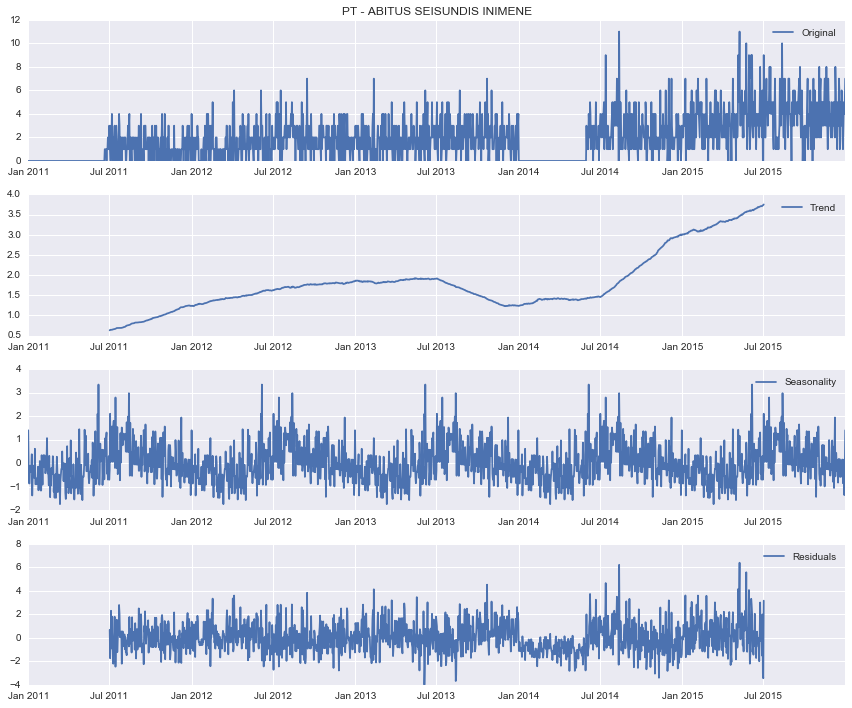

PT - ABITUS SEISUNDIS LOOM/LIND


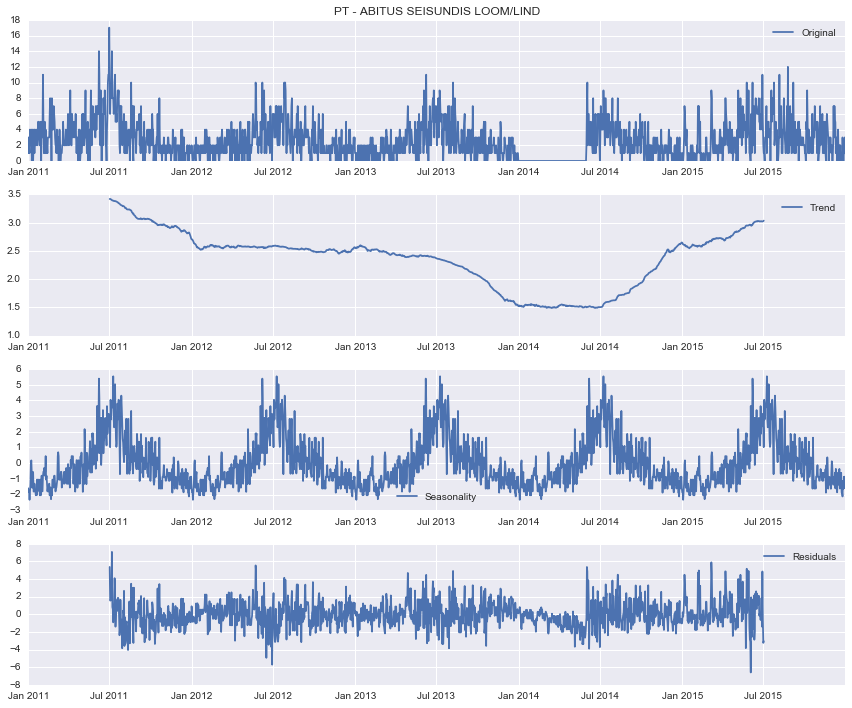

PT - LOODUSJÕUDUDEST PÕHJ. SÜNDMUS


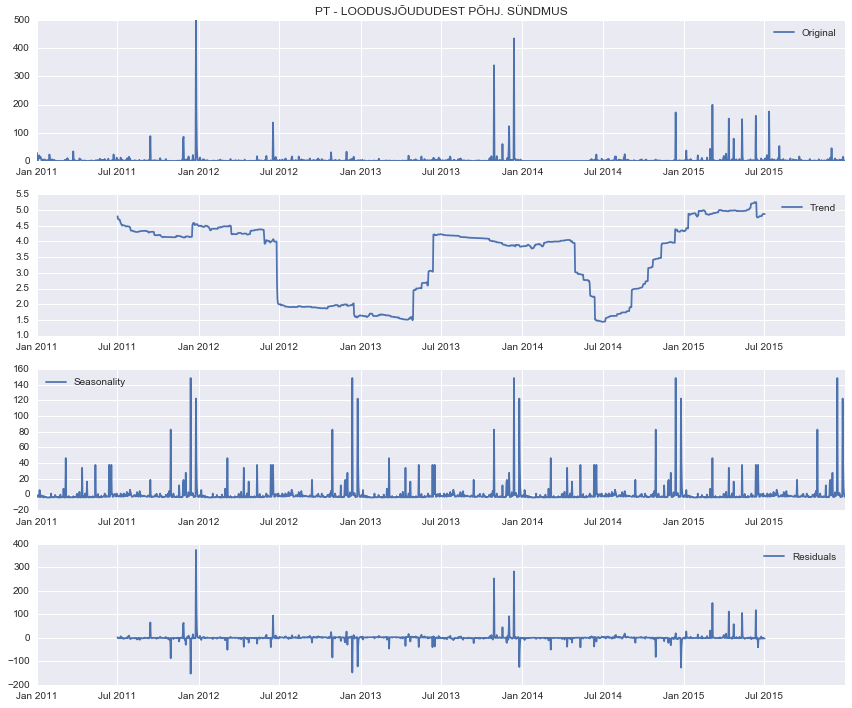

PT - SÜGAVUSEST JA KÕRGUSEST PÄÄSTMINE


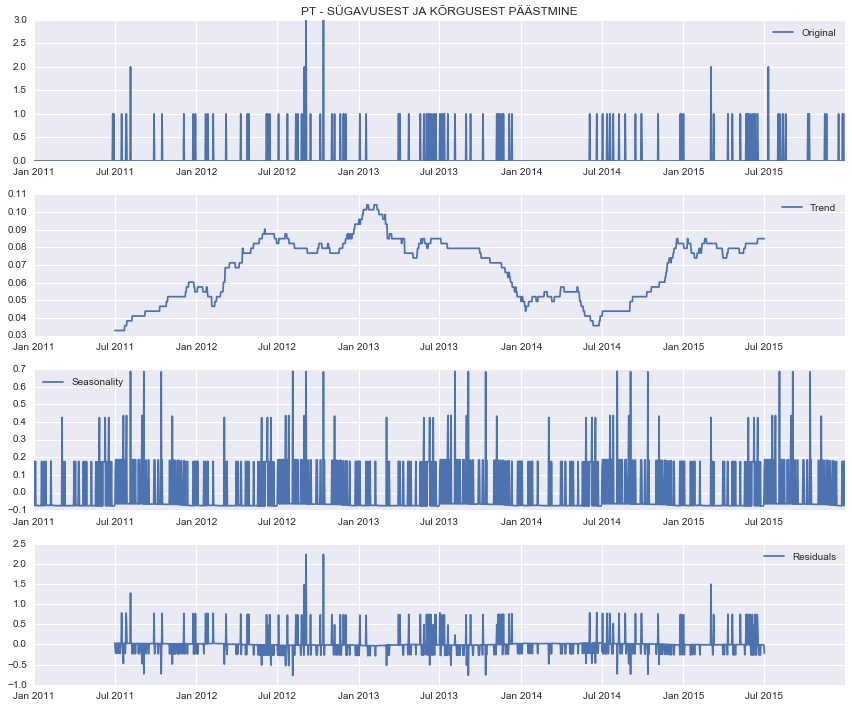

PT - VARING


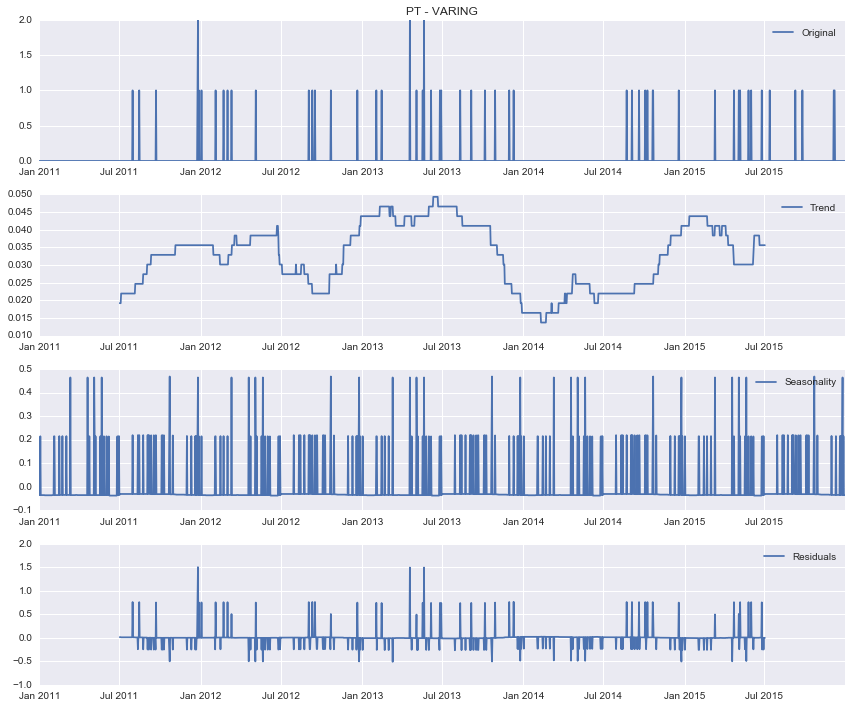

PÄÄSTETÖÖD


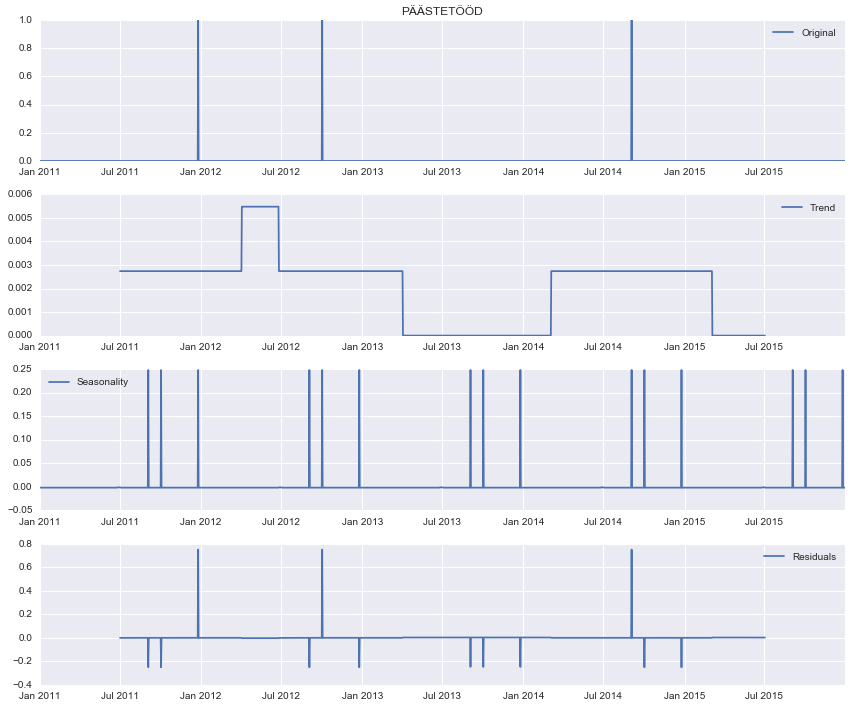

REOSTUMINE


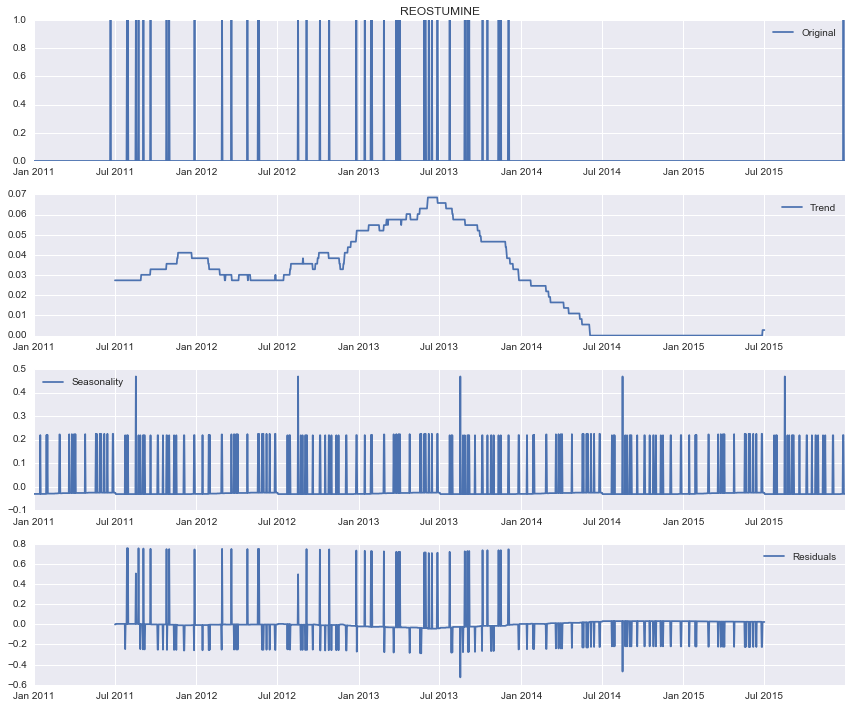

REOSTUMINE - BIOLOOGILINE


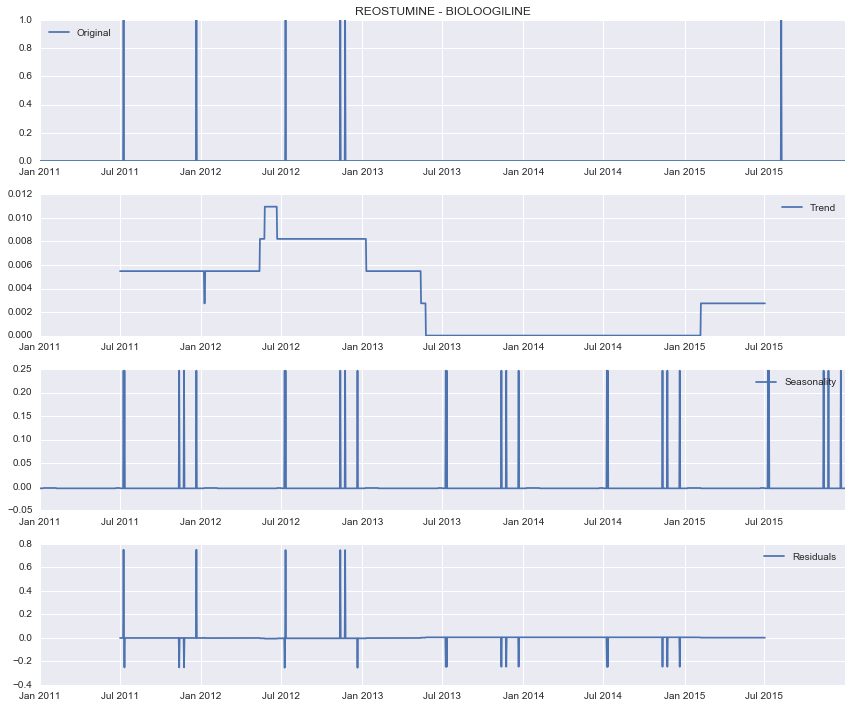

REOSTUMINE - GAASILINE


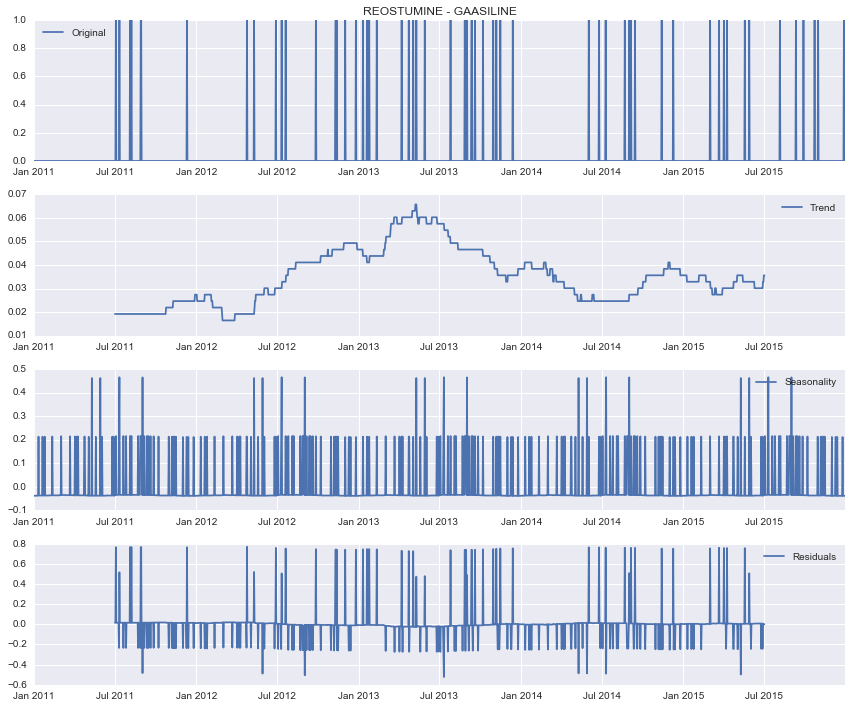

REOSTUMINE - KEEMILINE


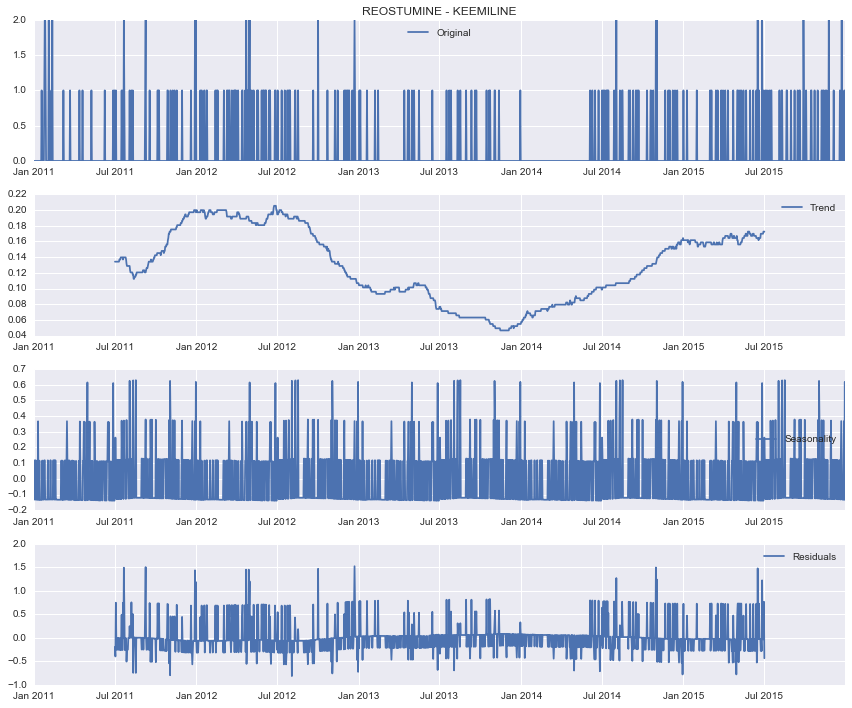

REOSTUMINE - NAFTASAADUSTEGA


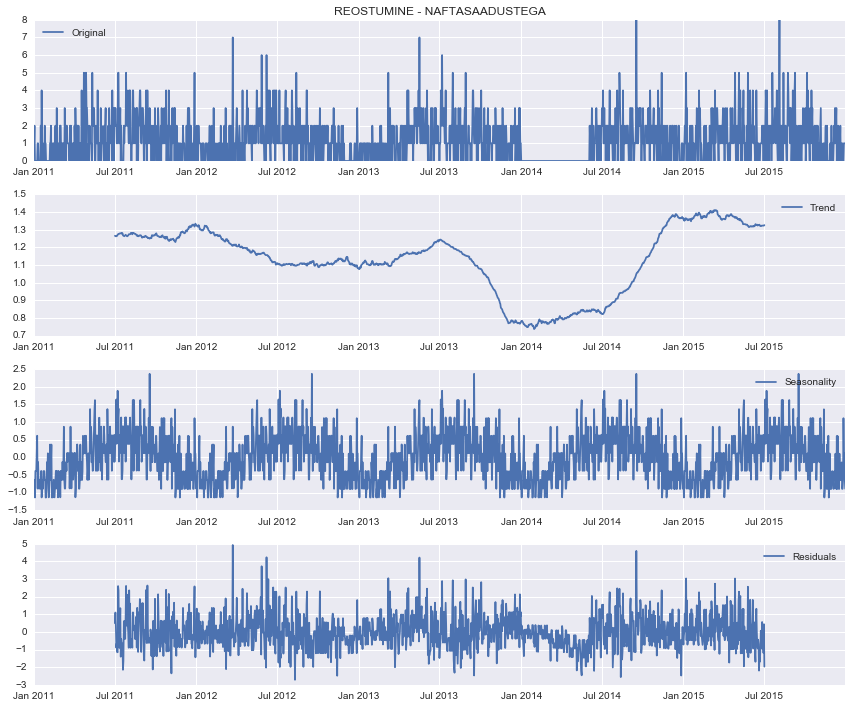

REOSTUMINE - RADIOAKTIIVNE


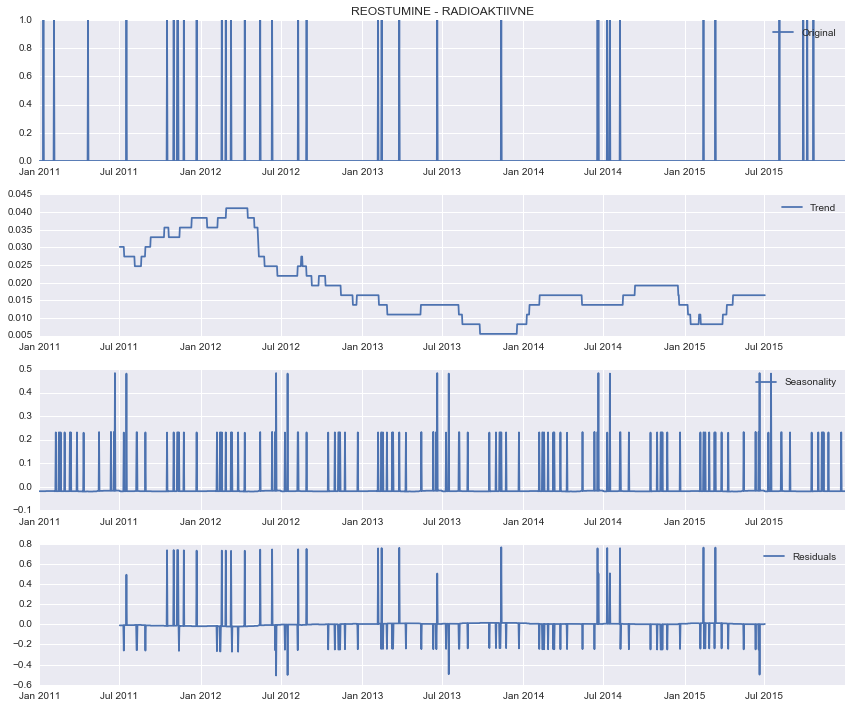

TK OHT


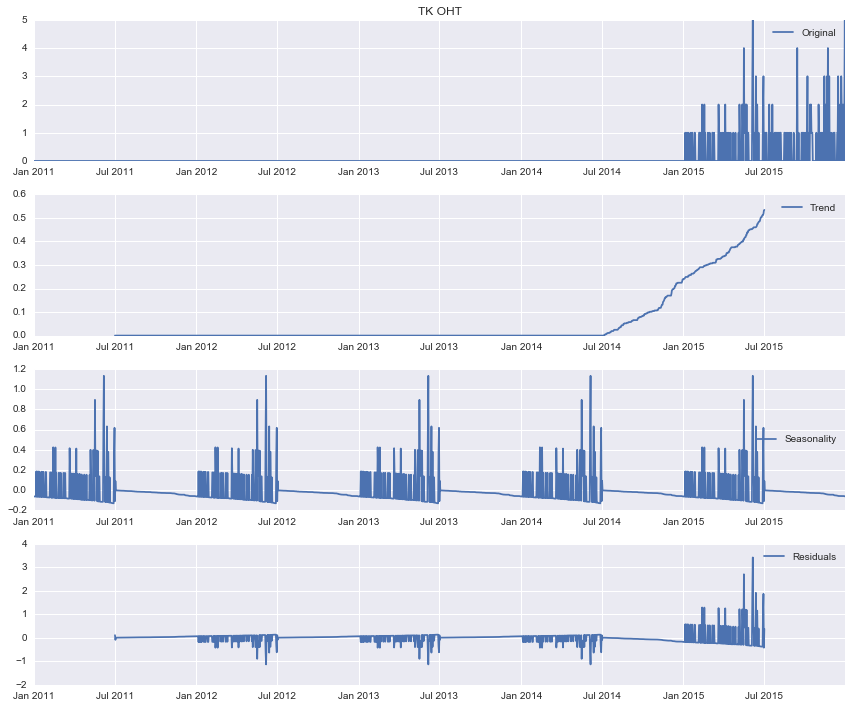

TR - LENNUÕNNETUS


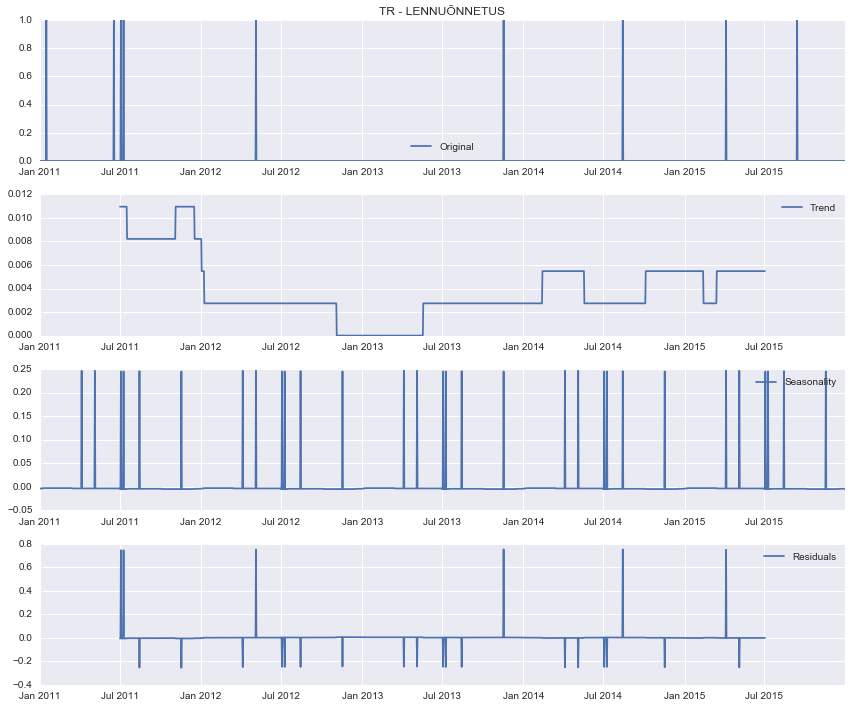

TR - LIIKLUSÕNNETUS


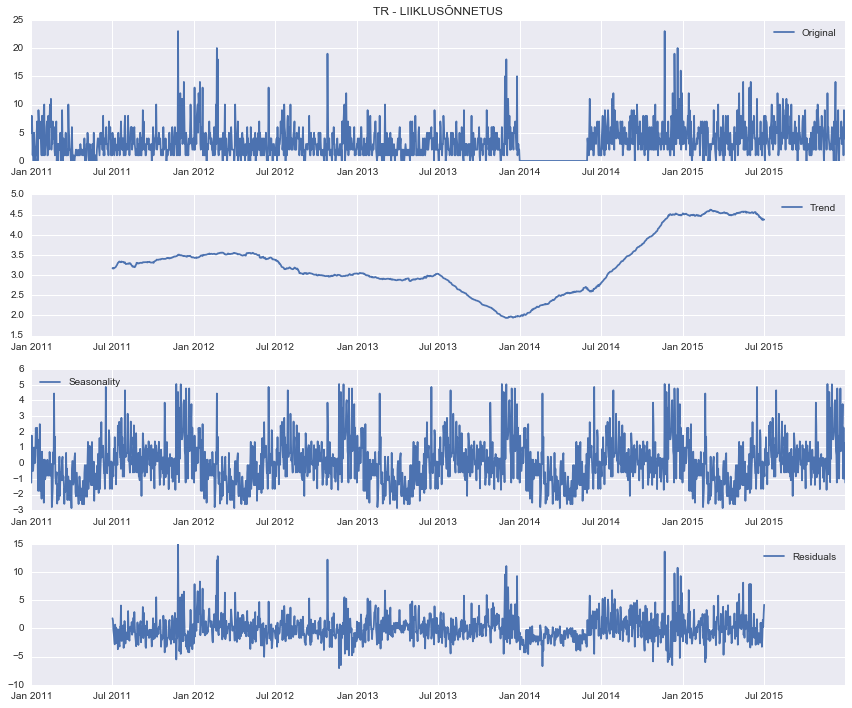

TR - RAUDTEEÕNNETUS


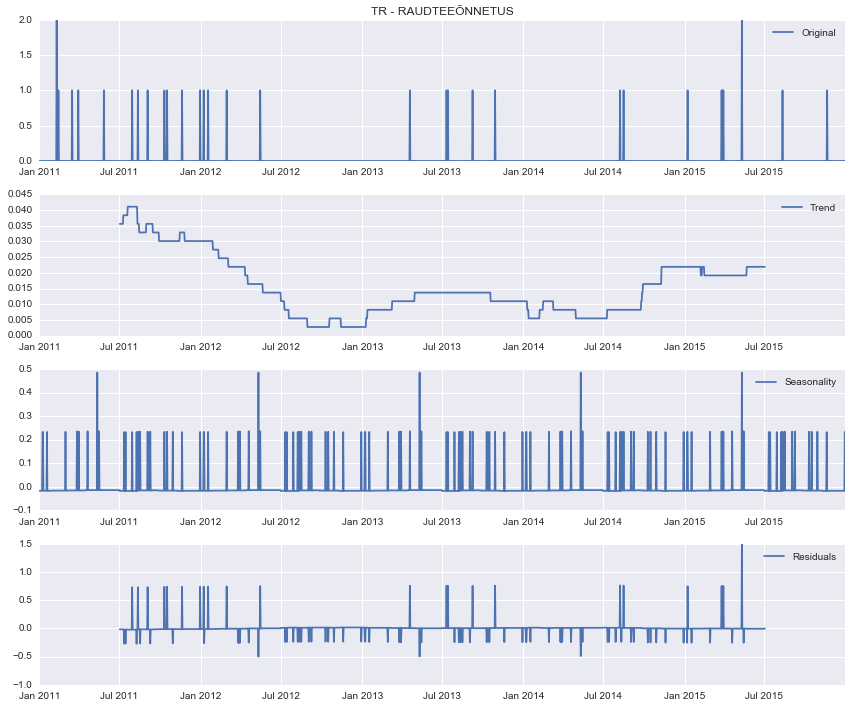

TRANSPORDIAVARII


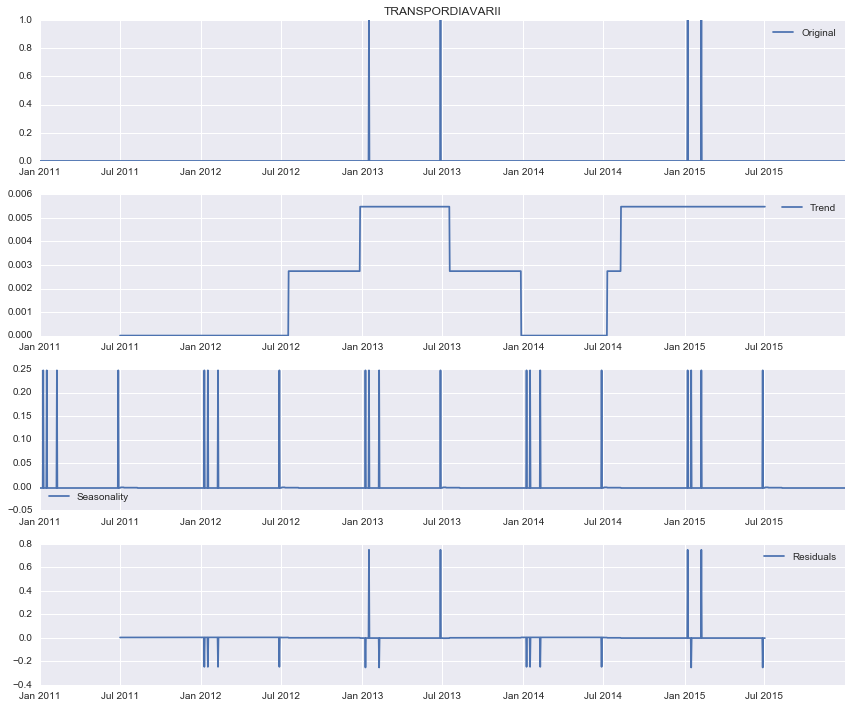

TULEKAHJU


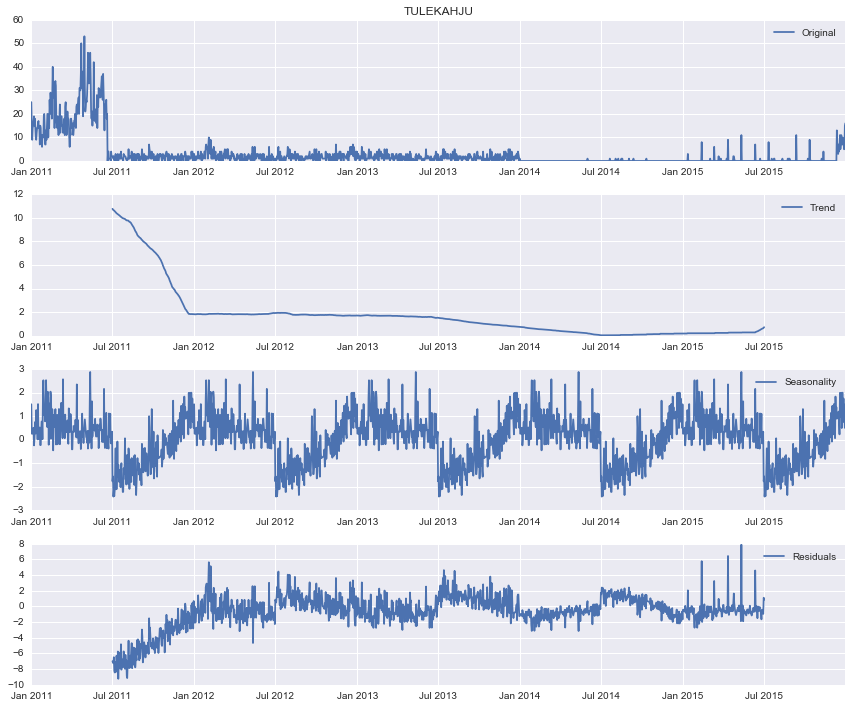

TULEKAHJU HOONES


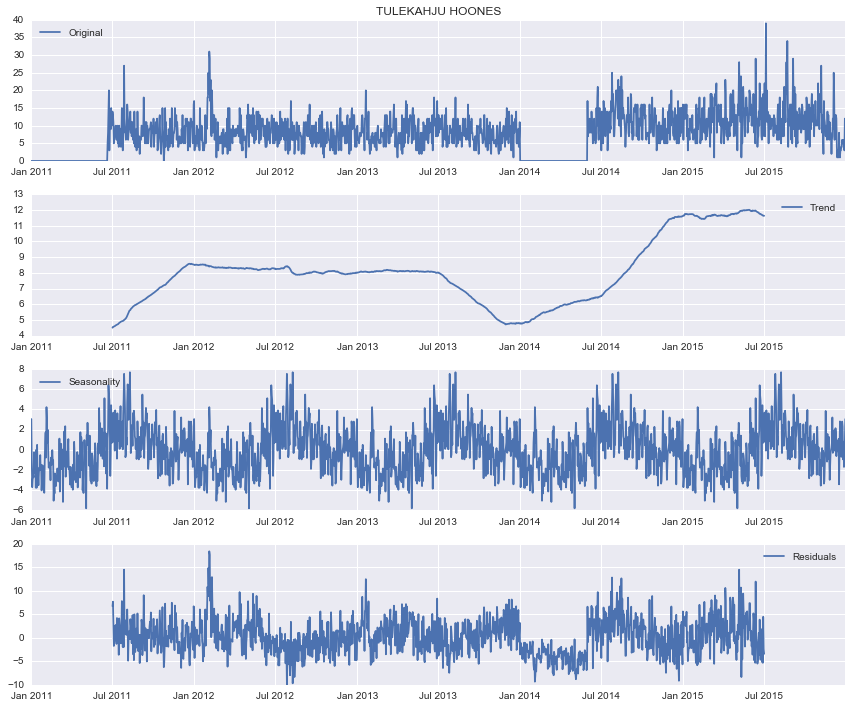

TULEKAHJU METSAS/MAASTIKUL


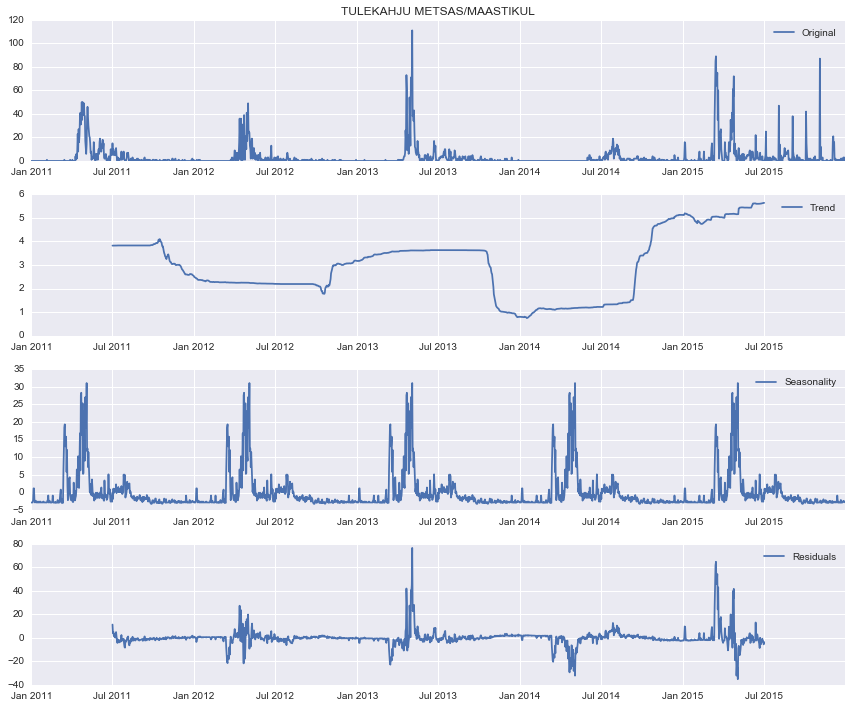

TULEKAHJU TRANSPORDIVAHENDIS


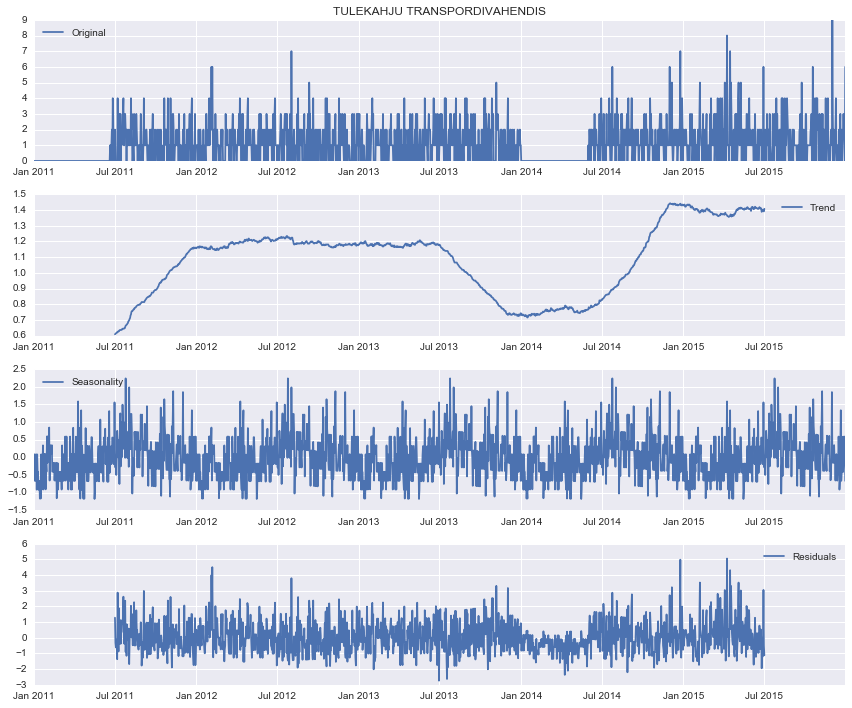

TULEKAHJU VÄLJASPOOL HOONEID


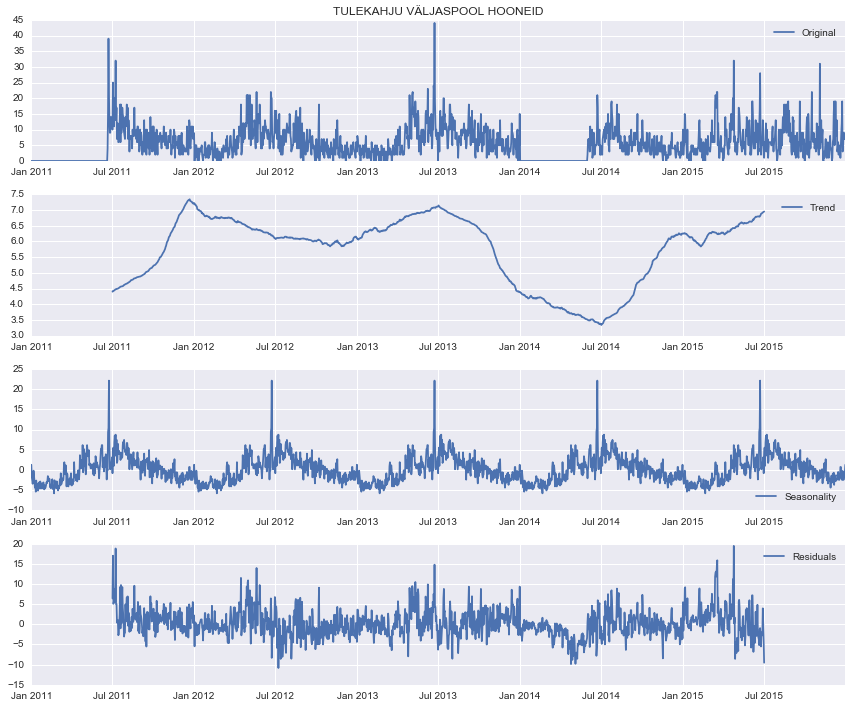

TULETÕRJE ALARM


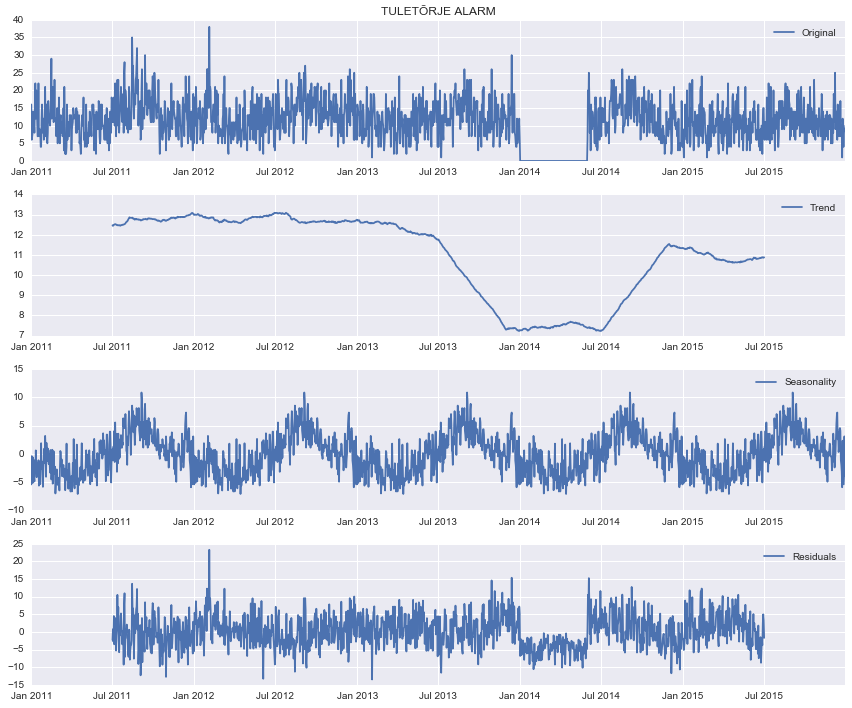

ÕNNETUS VEEKOGUL


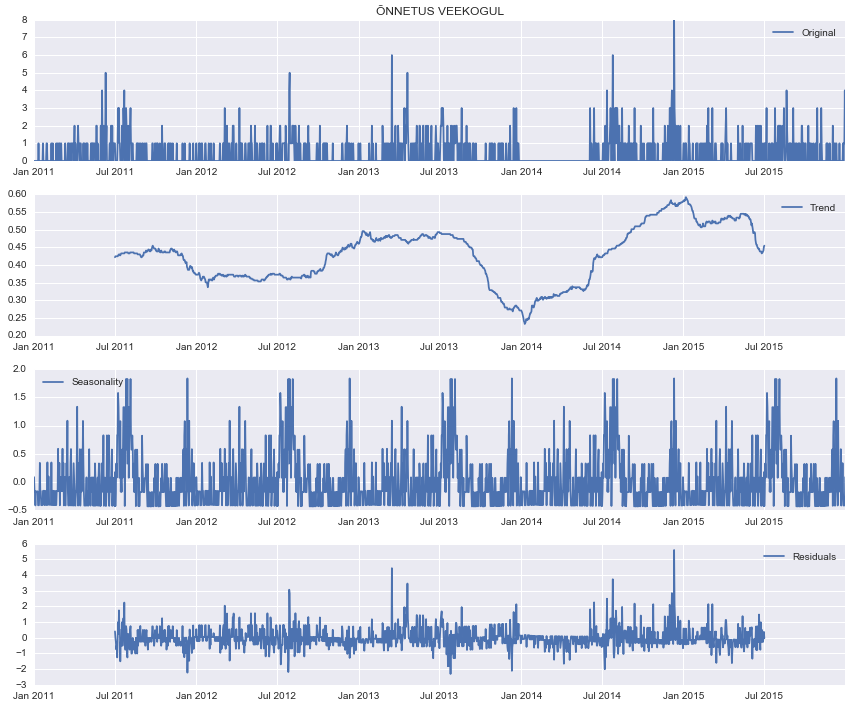

ÕPPUS


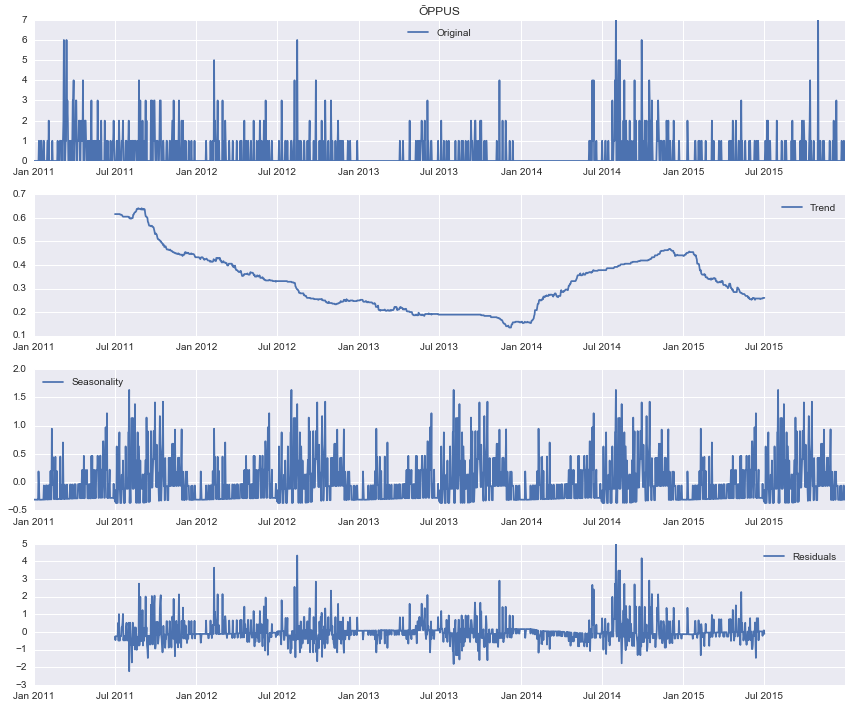

In [8]:
for column in daily_count_by_type.columns:
    print(column)
    plot_seasonality(daily_count_by_type[column])